In [1]:
#attempting to run a multilinear model

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
X_train = pd.read_csv("../Caroline/X_train42.csv")
y_train = pd.read_csv("../Caroline/y_train42.csv")
X_test = pd.read_csv("../Caroline/X_test42.csv")
y_test = pd.read_csv("../Caroline/y_test42.csv")

In [4]:
from sklearn import linear_model
ols = linear_model.LinearRegression()

In [5]:
ols.fit(X_train, y_train)

LinearRegression()

In [6]:
ols.score(X_train, y_train)

0.9371207742775771

In [7]:
ols.score(X_test, y_test)

0.9182864163090958

In [8]:
y_train

,SalePrice
0,118500
1,157000
2,254900
3,84500
4,174500
...,...
2041,165000
2042,76000
2043,114500
2044,163000


In [9]:
print(len(pd.DataFrame(ols.coef_).transpose()))
len(X_train.columns.tolist())

230


230

In [10]:
colnames = X_train.columns
result = pd.DataFrame(ols.coef_)
result.columns = colnames.tolist()
#result['intercept'] = ols.intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result

,coefficient
GrLivArea,36.246478
LotFrontage,5.954778
LotArea,0.655625
OverallQual,7130.373381
OverallCond,6141.413684
...,...
SaleCondition__Abnorml,-2812.608045
SaleCondition__AdjLand,-2692.953293
SaleCondition__Alloca,9878.390215
SaleCondition__Family,-6906.870939


In [11]:
import statsmodels.api as sm 
X_add_const = sm.add_constant(X_train)
ols = sm.OLS(y_train, X_add_const)
ans = ols.fit()
print(ans.summary())

#Royce says use Lasso to see which coefficients go down to 0 instead of selecting by p value

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     123.0
Date:                Fri, 20 May 2022   Prob (F-statistic):               0.00
Time:                        13:06:49   Log-Likelihood:                -23043.
No. Observations:                2046   AIC:                         4.653e+04
Df Residuals:                    1824   BIC:                         4.778e+04
Df Model:                         221                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -8.71

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Lasso

In [ ]:
#helpful website
# https://towardsdatascience.com/hyperparameter-tuning-in-lasso-and-ridge-regressions-70a4b158ae6d

In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
#first need to scale! I don't think joaquin's model scaled

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_train_scaled = pd.DataFrame(data = X_train_scaled, columns = X_train.columns)


In [31]:
from sklearn.model_selection import KFold, RepeatedKFold, GridSearchCV, cross_validate, train_test_split

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
lasso_alphas = np.linspace(0, 0.2, 21)
lasso = Lasso()
grid = dict()
grid['alpha'] = lasso_alphas
gscv = GridSearchCV(lasso, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = gscv.fit(X_train_scaled, y_train)
print('MAE: %.5f' % results.best_score_)
print('Config: %s' % results.best_params_)

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 328259725909.5355, tolerance: 1046646902.8857131
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310448568125.7391, tolerance: 1028366887.840753
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326334270108.06366, tolerance: 1044787361.2478063
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/pyt

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326801234397.6777, tolerance: 1010608984.5415325
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334515264290.11615, tolerance: 1053799586.4134442
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 312369000022.089, tolerance: 994535749.5642802
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/pyth

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 319732659684.14594, tolerance: 1050339289.6862177
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 322107298064.7459, tolerance: 1048732515.4688262
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 328422280904.1101, tolerance: 1053799586.4134442
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/py

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 286414109620.15906, tolerance: 994535749.5642802
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 313584415092.9012, tolerance: 1048732515.4688262
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 322269795681.4676, tolerance: 1053799586.4134442
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/pyt

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292147578562.90283, tolerance: 1050339289.6862177
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 304947830954.4813, tolerance: 1048732515.4688262
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 316058314598.8215, tolerance: 1053799586.4134442
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/py

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 320231854166.6778, tolerance: 1010608984.5415325
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 284574679070.3666, tolerance: 1036424683.7851509
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259408119747.94495, tolerance: 994535749.5642802
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/pyt

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 272842910210.01492, tolerance: 1036424683.7851509
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 318575412522.73517, tolerance: 1010608984.5415325
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246163280137.8684, tolerance: 1048912494.5606676
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/p

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 208611437513.7896, tolerance: 990929206.4557858
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 274416803685.71173, tolerance: 1005504806.5176598
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 264149808898.9717, tolerance: 1050184042.9622049
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/pyt

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 247233076899.6537, tolerance: 1052080099.4676436
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 224863684818.8103, tolerance: 1047703364.6238551
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191778872170.94382, tolerance: 990929206.4557858
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/pyt

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 216994892158.11658, tolerance: 1005111048.6330165
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233678664992.13672, tolerance: 1052080099.4676436
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 208843264356.09882, tolerance: 1063006280.4899575
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 253443229439.2282, tolerance: 1052031519.6904721
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296862853394.6001, tolerance: 1044787361.2478063
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 204228578143.85544, tolerance: 1005111048.6330165
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/py

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 221745849824.3683, tolerance: 1028366887.840753
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 243907008678.3776, tolerance: 1052031519.6904721
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 217612114252.56952, tolerance: 1046646902.8857131
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/pyt

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190132038962.92264, tolerance: 1054419832.3736948
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212285619616.5127, tolerance: 1028366887.840753
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205750543078.26385, tolerance: 1046646902.8857131
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/py

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 169069351474.06903, tolerance: 1057884878.7702297
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166330141203.0942, tolerance: 1025808436.1940352
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176095685021.51025, tolerance: 1054419832.3736948
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/p

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 266270393416.95184, tolerance: 1029033992.8264518
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119654449527.86899, tolerance: 1057250362.3172524
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130377826890.44662, tolerance: 1041057699.5024016
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170460763785.3996, tolerance: 1045978141.2331918
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200289042206.6369, tolerance: 1046264672.5671989
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176505120883.67526, tolerance: 1023402262.00393
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/pyth

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203081798125.952, tolerance: 1048732515.4688262
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112094639592.59055, tolerance: 994535749.5642802
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 124936643775.18497, tolerance: 1050339289.6862177
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/pyt

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83054980307.60211, tolerance: 1048912494.5606676
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301697598847.0835, tolerance: 1010608984.5415325
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147258257548.86234, tolerance: 1036424683.7851509
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/py

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191607143904.23978, tolerance: 1005504806.5176598
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150290968864.68335, tolerance: 1050184042.9622049
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67784967479.5116, tolerance: 1049263742.8807616
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/py

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 209227407869.7153, tolerance: 1080906040.3812797
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 149127776242.85757, tolerance: 1047703364.6238551
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74528656279.612, tolerance: 1063006280.4899575
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/pyth

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93000916778.8617, tolerance: 1052080099.4676436
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60550001857.1438, tolerance: 1063006280.4899575
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141242116108.39978, tolerance: 1047703364.6238551
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/pyth

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108522979109.16315, tolerance: 1046646902.8857131
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154399344810.15686, tolerance: 1052031519.6904721
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77895873191.11877, tolerance: 1005111048.6330165
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/p

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 124025976351.05893, tolerance: 1028366887.840753
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96515018190.29901, tolerance: 1046646902.8857131
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144209022412.38428, tolerance: 1052031519.6904721
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/py

MAE: -14703.61781
Config: {'alpha': 0.2}


/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123235192386.51715, tolerance: 1154369640.498672
  model = cd_fast.enet_coordinate_descent(


In [32]:
#could use geopy on the combo csvs and map like the highest sale prices or something


In [35]:
ridge = Ridge()
lasso = Lasso()

In [38]:
#Looking at lecture code
ridge.set_params(max_iter = 10000, normalize=True)
lasso.set_params(max_iter = 10000, normalize=True)
ridge_scores_train = []
lasso_scores_train = []
ridge_scores_test  = []
lasso_scores_test  = []

alphas = np.linspace(0.01, 10, 100)

for alpha in alphas:
            ridge.set_params(alpha=alpha)
            lasso.set_params(alpha=alpha)
            ridge.fit(X_train, y_train)
            lasso.fit(X_train, y_train)
            ridge_scores_train.append(ridge.score(X_train, y_train))
            ridge_scores_test.append(ridge.score(X_test, y_test))
            lasso_scores_train.append(lasso.score(X_train, y_train))
            lasso_scores_test.append(lasso.score(X_test, y_test))
ridge_scores_train = np.array(ridge_scores_train) 
ridge_scores_test  = np.array(ridge_scores_test)
lasso_scores_train = np.array(lasso_scores_train) 
lasso_scores_test  = np.array(lasso_scores_test)

In [47]:
max_index = list(lasso_scores_test).index(max(lasso_scores_test))
alphas[max_index]

3.1381818181818177

Text(0, 0.5, '$R^2$')

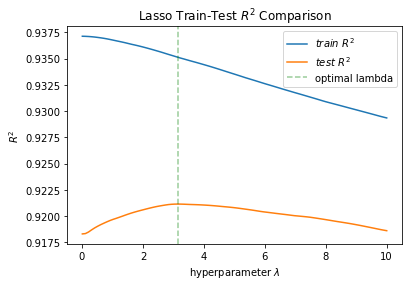

In [48]:
plt.plot(alphas, lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso Train-Test $R^2$ Comparison')
# lasso_underfit = lasso_scores_train < lasso_scores_test
# last_underfit  = np.max(alphas[lasso_underfit])
plt.axvline(alphas[max_index], linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [51]:
lasso.set_params(alpha=alphas[max_index], normalize = True)
lasso.fit(X_train, y_train)
print(lasso.score(X_train, y_train))
lasso.score(X_test, y_test)

0.9351268272163544


0.9211475146180282

In [64]:
optimal_coefs = lasso.coef_.reshape(1,230)

In [66]:
coefs_lasso = pd.DataFrame(optimal_coefs, columns = X_train.columns)  
coefs_lasso.head()

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,CentralAir,1stFlrSF,...,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__VWD,SaleCondition__Abnorml,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Partial
0,57.848305,10.094066,0.608091,7548.783706,5865.550522,401.939559,28.108922,11.35646,-342.28316,2.229687,...,0.0,-4843.636799,0.0,-9547.535825,-0.0,-1522.335783,-2895.882877,5896.072585,-8204.61863,6987.821785


In [81]:
coefs_lasso == 0

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,CentralAir,1stFlrSF,...,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__VWD,SaleCondition__Abnorml,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Partial
0,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,True,False,False,False,False,False


In [84]:
to_drop = coefs_lasso.columns[(coefs_lasso == 0).all()]

In [85]:
to_drop


Index(['FullBath', 'TotRmsAbvGrd', 'Fence', 'MSSubClass__40', 'MSSubClass__45',
       'MSSubClass__50', 'MSSubClass__70', 'MSSubClass__85', 'MSSubClass__180',
       'MSZoning__A (agr)', 'MSZoning__I (all)', 'MSZoning__RH',
       'LotConfig__Corner', 'Neighborhood__Mitchel', 'Neighborhood__OldTown',
       'Neighborhood__SawyerW', 'Neighborhood__Timber', 'Condition1__PosN',
       'Condition2__Artery', 'Condition2__RRAn', 'BldgType__2fmCon',
       'BldgType__Duplex', 'HouseStyle__2Story', 'HouseStyle__SLvl',
       'RoofStyle__Hip', 'Exterior1st__AsbShng', 'Exterior1st__AsphShn',
       'Exterior1st__BrkComm', 'Exterior1st__MetalSd', 'Exterior1st__Plywood',
       'Exterior1st__Stucco', 'Exterior2nd__Brk Cmn', 'Exterior2nd__CBlock',
       'Exterior2nd__PreCast', 'Exterior2nd__Stone', 'Exterior2nd__Wd Sdng',
       'Foundation__BrkTil', 'Foundation__Slab', 'BsmtCond__Gd',
       'BsmtCond__NA', 'BsmtCond__Po', 'BsmtExposure__NA', 'HeatingQC__Po',
       'Electrical__FuseA', 'Electri

In [ ]:
#Now should go through these items and see what the deal is. Are they just items that had very few houses matching?
#cant just drop cols 